In [1]:
def decode(s):
    key = "bdhpF,82QsLirJejtNmzZKgnB3SwTyXG ?.6YIcflxVC5WE94UA1OoD70MkvRuPqHa"
    dec = ""
    cnt = 0
    for i in s:
        cnt += 1
        if i in key:
            dec += key[key.index(i) - cnt % len(key)]
        else:
            dec += i
    return dec

print(decode("bdhpF,82QsLirJejtNmzZKgnB3SwTyXG ?.6YIcflxVC5WE94UA1OoD70MkvRuPqHabdhpF,82QsLir"))

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


90


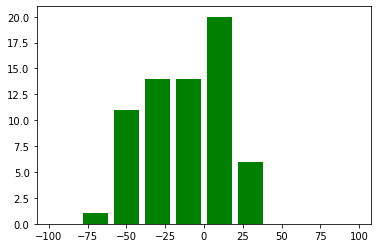

In [9]:
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

from matplotlib import pyplot as plt
from z3 import *

enc = "bdhpF,82QsLirJejtNmzZKgnB3SwTyXG ?.6YIcflxVC5WE94UA1OoD70MkvRuPqHa"
plain = "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"

ints_plain = Ints("plain_%d" % i for i in range(len(plain)))
ints_key = Ints("key_%d" % i for i in range(len(enc)))

plain_value = [(ints_plain[i] == ord(plain[i])) for i in range(len(plain))]
result_enc = [(ints_key[i] + ints_plain[i] == ord(enc[i]))
               for i in range(len(enc))]

s = Solver()
s.add(plain_value + result_enc)
if s.check() == sat:
    m = s.model()
    num_arr = ([int("%s" % (m[i])) for i in ints_key])
    # print(abs(max(num_arr))+abs(min(num_arr)))
    
    # setting the ranges and no. of intervals
    range = (-100, 100)
    bins = 10
    
    # plotting a histogram
    plt.hist(num_arr, bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)
    
